In [1]:
import pandas as pd
import json
%pylab inline
import seaborn as sns
import re
with open('personality_output.json','r') as fp:
    personality_output = json.load(fp)
binny = pd.read_csv('selected_personality.txt',delimiter = '\n',dtype = str,header = None)[0].tolist()

Populating the interactive namespace from numpy and matplotlib


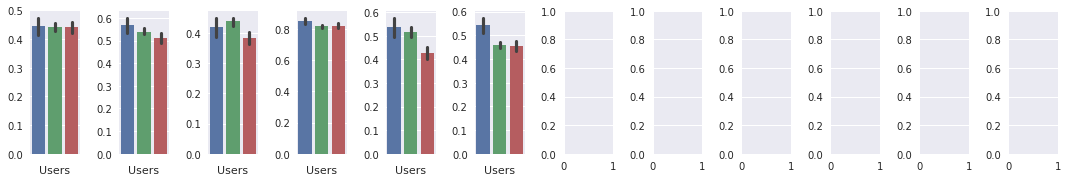

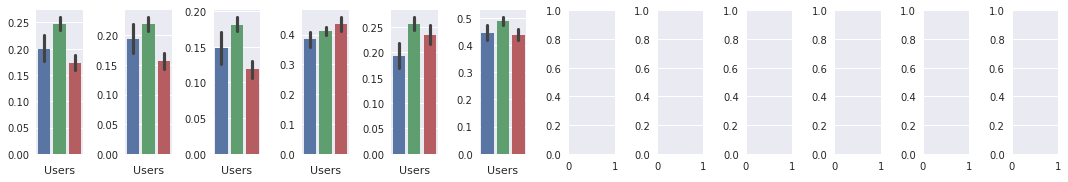

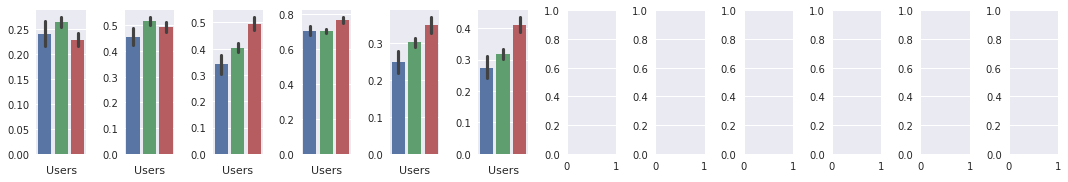

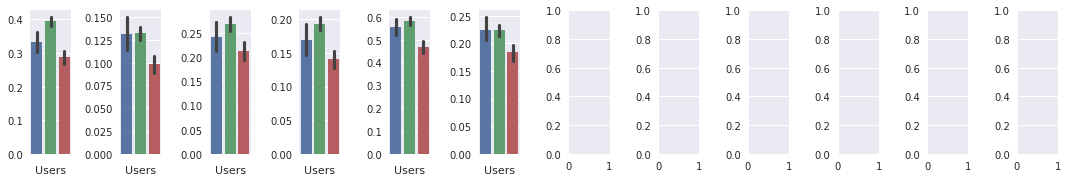

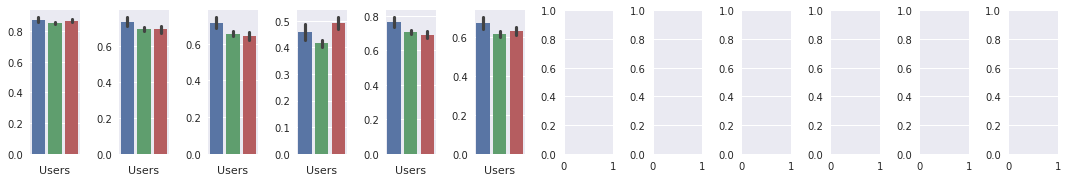

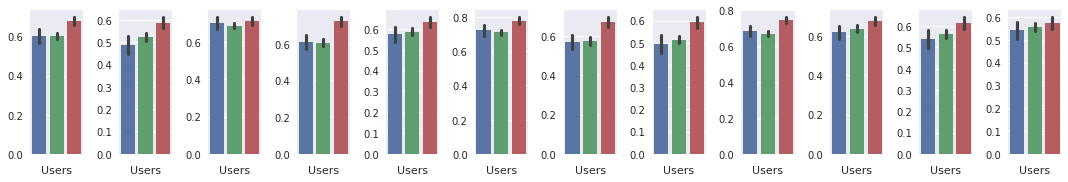

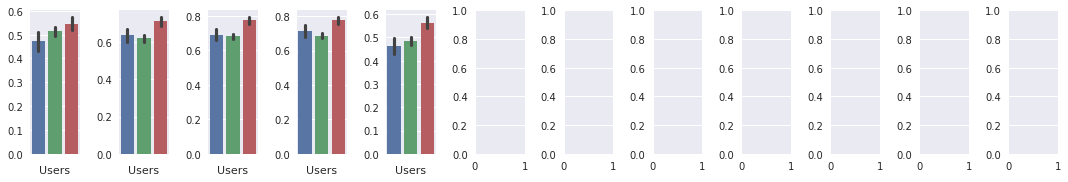

In [2]:
sns.set()
# keys = pd.read_csv('selected_personality.txt',delimiter = '\n',header = None).values.ravel().tolist()
keys = ['_r_personality_parent','_r_personality_parent_Openness','_r_personality_parent_Conscientiousness'
        ,'_r_personality_parent_Extraversion','_r_personality_parent_Agreeableness',
        '_r_personality_parent_Neuroticism','_r_needs_parent','_r_values_parent']
###############################
hate_df = pd.DataFrame(np.c_[['hate' for i in range(len(list(personality_output.values())[0]['hate']))]]
                            ,columns =['Users'] )
counter_df = pd.DataFrame(np.c_[['counter' for i in range(len(list(personality_output.values())[0]['counter']))]]
                            ,columns =['Users'] )
Noncounter_df = pd.DataFrame(np.c_[['Noncounter' for i in range(len(list(personality_output.values())[0]['noncounter']))]]
                            ,columns =['Users'] )
c = 0
for key,value in personality_output.items():
    if key not in keys:
        hate_df[key] = value['hate']
        counter_df[key] = value['counter']
        Noncounter_df[key] = value['noncounter']
    else:
        comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
        comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
        num_subplots = len(comb_df.columns[1:])
        if num_subplots>=2:
            f,axes = plt.subplots(1,12,figsize = (15,2.7))
            for i,column in enumerate(comb_df.columns[1:]):
                sns.barplot(x = 'Users',y =column,data = comb_df,ax = axes[i])
    #                     axes[plot].set_yticklabels([])
                axes[i].set_ylabel('')    
#                 axes[i].set_xlabel(re.findall(r'[^_]+',column)[-1])
    #                     axes[plot].set_size_inches(w=11,h=7)
    #                     axes[plot].
    #                     for tick in axes[plot].get_xticklabels():
    #                         tick.set_rotation(45)
                axes[i].set_xticklabels([])
            plt.tight_layout()
            plt.show()
            hate_df = pd.DataFrame(np.c_[['hate' for i in range(len(list(personality_output.values())[0]['hate']))]]
                                ,columns =['Users'] )
            counter_df = pd.DataFrame(np.c_[['counter' for i in range(len(list(personality_output.values())[0]['counter']))]]
                                ,columns =['Users'] )
            Noncounter_df = pd.DataFrame(np.c_[['Noncounter' for i in range(len(list(personality_output.values())[0]['noncounter']))]]
                                ,columns =['Users'] )
            
#################################### END PLOT ###############################################
comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
num_subplots = len(comb_df.columns[1:])

f,axes = plt.subplots(1,12,figsize = (15,2.7))
#                 print(num_subplots)
for i,column in enumerate(comb_df.columns[1:]):
    sns.barplot(x = 'Users',y =column,data = comb_df,ax = axes[i])
#                     axes[plot].set_yticklabels([])
    axes[i].set_ylabel('')    
#     axes[i].set_xlabel(re.findall(r'[^_]+',column)[-1])
    axes[i].set_xticklabels([])
plt.tight_layout()
plt.show()

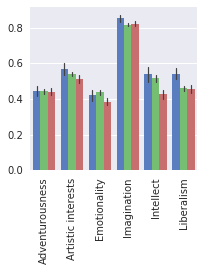

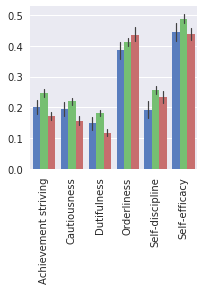

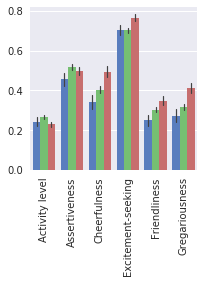

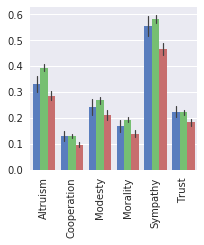

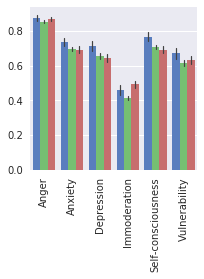

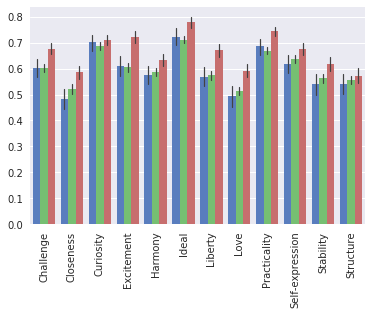

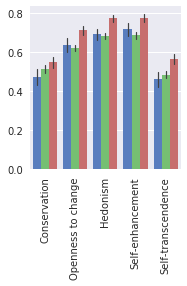

In [3]:
sns.set(palette = 'muted')
# keys = pd.read_csv('selected_personality.txt',delimiter = '\n',header = None).values.ravel().tolist()
keys = ['_r_personality_parent','_r_personality_parent_Openness','_r_personality_parent_Conscientiousness'
        ,'_r_personality_parent_Extraversion','_r_personality_parent_Agreeableness',
        '_r_personality_parent_Neuroticism','_r_needs_parent','_r_values_parent']
###############################
hate_df = pd.DataFrame()
counter_df = pd.DataFrame()
Noncounter_df = pd.DataFrame()
for key,value in personality_output.items():
    if key not in keys:
        temp_h = pd.DataFrame(np.c_[['hate' for i in range(len(list(personality_output.values())[0]['hate']))]]
                                ,columns =['Users'])
        temp_c = pd.DataFrame(np.c_[['counter' for i in range(len(list(personality_output.values())[0]['counter']))]]
                                ,columns =['Users'] )
        temp_nc = pd.DataFrame(np.c_[['Noncounter' for i in range(len(list(personality_output.values())[0]['noncounter']))]]
                                ,columns =['Users'] )
        temp_h['Value'],temp_c['Value'],temp_nc['Value'] = value['hate'],value['counter'],value['noncounter']
        temp_h['Attributes'],temp_c['Attributes'],temp_nc['Attributes'] = re.findall(r'[^_]+',key)[-1],re.findall(r'[^_]+',key)[-1],re.findall(r'[^_]+',key)[-1]
        hate_df = pd.concat([hate_df,temp_h],ignore_index = True)
        counter_df = pd.concat([counter_df,temp_c],ignore_index = True)
        Noncounter_df = pd.concat([Noncounter_df,temp_nc],ignore_index = True)
    else:
        try:
            if len(set(hate_df['Attributes']))==12:
                comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
                comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
#                 plt.figure(figsize = (3,3))
                ax = sns.barplot(x ='Attributes' ,y ='Value' ,data = comb_df , hue = 'Users',errwidth=1.2)
                ax.set_xlabel('')
                ax.set_ylabel('')
                plt.xticks(rotation='vertical')
                ax.legend_.remove()
                plt.show()
                hate_df = pd.DataFrame()
                counter_df = pd.DataFrame()
                Noncounter_df = pd.DataFrame()
            else:
                comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
                comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
                plt.figure(figsize = (3,3))
                ax = sns.barplot(x ='Attributes' ,y ='Value' ,data = comb_df , hue = 'Users',errwidth=1.2)

                ax.set_xlabel('')
                ax.set_ylabel('')
                plt.xticks(rotation='vertical')
                ax.legend_.remove()
                plt.show()
                hate_df = pd.DataFrame()
                counter_df = pd.DataFrame()
                Noncounter_df = pd.DataFrame()
        except:
            pass
#################################### END PLOT ###############################################
comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
plt.figure(figsize = (2.7,3))
ax = sns.barplot(x ='Attributes' ,y ='Value' ,data = comb_df , hue = 'Users',errwidth=1.2)
ax.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation='vertical')
plt.show()

In [4]:
keys = ['_r_personality_parent_Agreeableness',
'_r_personality_parent_Agreeableness_Altruism',
'_r_personality_parent_Agreeableness_Cooperation',
'_r_personality_parent_Agreeableness_Modesty',
'_r_personality_parent_Agreeableness_Morality',
'_r_personality_parent_Agreeableness_Sympathy',
'_r_personality_parent_Agreeableness_Trust',
'_r_personality_parent_Neuroticism_Immoderation',
'_r_personality_parent_Neuroticism_Self-consciousness']

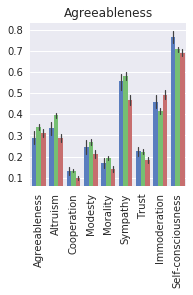

In [5]:
sns.set(palette = 'muted')
hate_df = pd.DataFrame()
counter_df = pd.DataFrame()
Noncounter_df = pd.DataFrame()
for key,value in personality_output.items():
    if key in keys:
        temp_h = pd.DataFrame(np.c_[['hate' for i in range(len(list(personality_output.values())[0]['hate']))]]
                                        ,columns =['Users'])
        temp_c = pd.DataFrame(np.c_[['counter' for i in range(len(list(personality_output.values())[0]['counter']))]]
                                ,columns =['Users'] )
        temp_nc = pd.DataFrame(np.c_[['Noncounter' for i in range(len(list(personality_output.values())[0]['noncounter']))]]
                                ,columns =['Users'] )
        temp_h['Value'],temp_c['Value'],temp_nc['Value'] = value['hate'],value['counter'],value['noncounter']
        if len(re.findall(r'[^_]+',key)) == 3:
            temp_h['Attributes'],temp_c['Attributes'],temp_nc['Attributes'] = re.findall(r'[^_]+',key)[-2],re.findall(r'[^_]+',key)[-2],re.findall(r'[^_]+',key)[-2]
        else:
            temp_h['Attributes'],temp_c['Attributes'],temp_nc['Attributes'] = re.findall(r'[^_]+',key)[-1],re.findall(r'[^_]+',key)[-1],re.findall(r'[^_]+',key)[-1]
        hate_df = pd.concat([hate_df,temp_h],ignore_index = True)
        counter_df = pd.concat([counter_df,temp_c],ignore_index = True)
        Noncounter_df = pd.concat([Noncounter_df,temp_nc],ignore_index = True)

comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
comb_df = comb_df.apply(pd.to_numeric ,errors = 'ignore')
plt.figure(figsize = (2.8,3))
ax = sns.barplot(x ='Attributes' ,y ='Value' ,data = comb_df , hue = 'Users',errwidth=1.2)
ax.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('')
plt.ylim(ymin = 0.06)
title = re.findall(r'[^_]+',keys[0])[-1]
if len(re.findall(r'[^_]+',keys[0])) == 3:
    plt.title(re.findall(r'[^_]+',keys[0])[-2])
else:
    plt.title(re.findall(r'[^_]+',keys[0])[-1])
plt.xticks(rotation='vertical')
plt.show()

In [6]:
np.median(list(personality_output.values())[0]['hate'])

0.09212864619707506

In [9]:
%matplotlib inline
from math import pi
matplotlib.use('Agg')

/home/navish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/navish/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/navish/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/navish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/navish/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/navish/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
 

PolarAxesSubplot(0.260833,0.125;0.503333x0.755)


/home/navish/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/navish/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


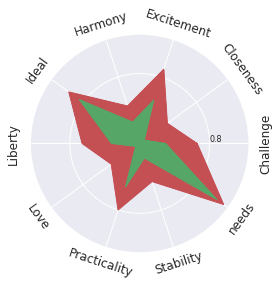

'Challenge'

In [20]:
keys = ['_r_values_parent',
_r_values_parent_Openness to change
_r_values_parent_Hedonism
_r_values_parent_Self-enhancement
_r_values_parent_Self-transcendence]

sns.set(palette = 'muted')
hate_df = {}
counter_df = {}
Noncounter_df = {}
for key,value in personality_output.items():
    if key in keys:
        if len(re.findall(r'[^_]+',key)) == 3:
            hate_df.update({re.findall(r'[^_]+',key)[-2]:np.median(value['hate'])})
            counter_df.update({re.findall(r'[^_]+',key)[-2]:np.median(value['counter'])})
            Noncounter_df.update({re.findall(r'[^_]+',key)[-2]:np.median(value['noncounter'])})
        else:
            hate_df.update({re.findall(r'[^_]+',key)[-1]:np.median(value['hate'])})
            counter_df.update({re.findall(r'[^_]+',key)[-1]:np.median(value['counter'])})
            Noncounter_df.update({re.findall(r'[^_]+',key)[-1]:np.median(value['noncounter'])})
df = pd.DataFrame([Noncounter_df,counter_df,hate_df])
     
skills = list(df)
num_skills = len(skills)
angles = [i / float(num_skills) * 2 * pi for i in range(num_skills)]
angles += angles[:1]  # repeat the first value to close the circle
GRAY = '#999999'

# Clear the plot to start with a blank canvas.
plt.clf()

# Create subplots for each data series
counter = plt.subplot(111,projection='polar') 
counter.set_xticks(angles)
counter.set_xticklabels(skills, fontsize=10)
Noncounter = plt.subplot(111,projection='polar')
Noncounter.set_xticks(angles)
Noncounter.set_xticklabels(skills, fontsize=10)
hate = plt.subplot(111,projection='polar') 
hate.set_xticks(angles)
hate.set_xticklabels(skills, fontsize=10)

#######################################################################################################################
plt.xticks(angles, skills, size=10)
plt.yticks(np.arange(0,0.82,0.2),
  ['0.0','0.2', '0.4', '0.6','0.8'],size=8)
#######################################################################################################################
# Constrain y axis to range 0-100
# plt.ylim(ymin=0.0, ymax=0.62)

Noncounter_values = df.loc[0] \
                    .values \
                    .flatten() \
                    .tolist()
Noncounter_values += Noncounter_values[:1]  # duplicate first element to close the circle

counter_values = df.loc[1] \
                    .values \
                    .flatten() \
                    .tolist()
counter_values += counter_values[:1]   # duplicate first element to close the circle

hate_values = df.loc[2] \
                    .values \
                    .flatten() \
                    .tolist()
hate_values += hate_values[:1]   # duplicate first element to close the circle

# Set up colors
red = '#c44e52'
green = '#55a868'
blue = '#4c72b0'



############################################ Plot Noncounter ########################
# Noncounter.set_rlabel_position(0)
# Noncounter.plot(
#   angles,
#   Noncounter_values,
#   color=blue,
#   linestyle='solid',
#   linewidth=2,
# )
# Noncounter.fill(
#   angles,
#   Noncounter_values,
#   color=blue,
#   alpha=.99
# )
# Noncounter.set_xticks(angles)
# Noncounter.set_xticklabels(skills, fontsize=10)
############################################# Plot hate###########################
hate.set_rlabel_position(0)
hate.plot(
  angles,
  hate_values,
  color=red,
  linestyle='solid',
  linewidth=1,
)

hate.fill(
  angles,
  hate_values,
  color=red,
  alpha=0.99
)

################################## Plot  counter ############################
counter.set_rlabel_position(0)
counter.plot(
  angles,
  counter_values,
  color=green,
  linestyle='solid',
  linewidth=1
)
counter.fill(
  angles,
  counter_values,
  color=green,
  alpha=.99
)




plt.gcf().canvas.draw()
angles = np.linspace(0,2*np.pi,len(hate.get_xticklabels()))
angles[np.sin(angles) > 0] = angles[np.sin(angles) > 0] + np.pi
for ax in [Noncounter]:
#     labels = []
    print(ax)
    for label, angle in zip(ax.get_xticklabels(), np.rad2deg(angles)):
#         print(label)
        x,y = label.get_position()
        
        lab = ax.text(x,y-0.03, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va())
#         print(x,y)
        lab.set_rotation(angle+90)
#         labels.append(lab)
    ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('needs.eps',format = 'eps',dpi = 1200)
plt.show()
skills[0]